## Projects on Netflix Data Visualisation and recomendation system ##
$
\\Netflix
$

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importing Netflix Dataset

df=pd.read_csv('netflix_titles.csv')
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [3]:
df.shape

(7787, 12)

In [4]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [6]:
#As we can see 'release_year' is string type, we need to convert this column into date type
df.date_added=pd.to_datetime(df.date_added )
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [7]:
df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [8]:
print(df.show_id.isnull().value_counts())
print(df.type.isnull().value_counts())
print(df.title.isnull().value_counts())
print(df.director.isnull().value_counts())
print(df.cast.isnull().value_counts())
print(df.country.isnull().value_counts())
print(df.date_added.isnull().value_counts())
print(df.release_year.isnull().value_counts())
print(df.rating.isnull().value_counts())
print(df.duration.isnull().value_counts())
print(df.listed_in.isnull().value_counts())
print(df.description.isnull().value_counts())

False    7787
Name: show_id, dtype: int64
False    7787
Name: type, dtype: int64
False    7787
Name: title, dtype: int64
False    5398
True     2389
Name: director, dtype: int64
False    7069
True      718
Name: cast, dtype: int64
False    7280
True      507
Name: country, dtype: int64
False    7777
True       10
Name: date_added, dtype: int64
False    7787
Name: release_year, dtype: int64
False    7780
True        7
Name: rating, dtype: int64
False    7787
Name: duration, dtype: int64
False    7787
Name: listed_in, dtype: int64
False    7787
Name: description, dtype: int64


In [9]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

 According to above description 'director':2389, 'cast':718, 'country':507, 'date_added':10, 'rating':7 has null value. We need to remove this null value or fill with corresponding values. 

In [10]:
#Visualize the null values through heat map
!pip install missingno


In [11]:
import seaborn as sns
import missingno as ms

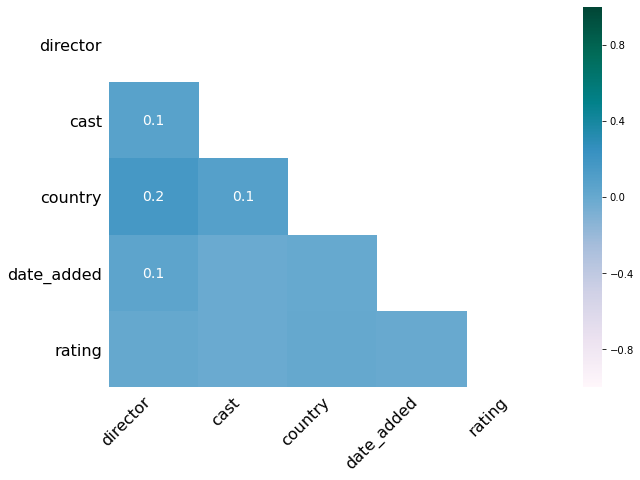

In [12]:
heatmap_null_values=ms.heatmap(df, figsize=(10,7), cmap='PuBuGn')

In [13]:
#count of unique values
unique_val=df.nunique()
unique_val

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1512
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [14]:
#Null values of corresponding rows
df[df.rating.isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
67,s68,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,2017-01-26,2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
2359,s2360,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,2016-12-01,2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
3660,s3661,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,2018-02-01,2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
3736,s3737,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
3737,s3738,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
3738,s3739,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...
4323,s4324,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,2017-03-01,2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [15]:
#Fill 'ratings' NaN values with specific ratings
user_rating={67:'TV-MA', 2359:'R',3660:'R', 3736:'PG-13', 3737:'TV-MA', 3738:'R', 4323:'PG-13'}

In [16]:
df.rating=df.rating.fillna(user_rating)

In [17]:
df.rating.isnull().value_counts()

False    7787
Name: rating, dtype: int64

In [18]:
df[df.rating.isna()] # No null values are present in rating column

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [19]:
#Replacing country null value with maximum number of country
country=df.loc[df.country.notnull(), 'country'].astype('str').apply(lambda t: t.split(', '))

country=list(country)
len(country)

7280

In [20]:
!pip install mlxtend

     |████████████████████████████████| 1.4MB 15.2MB/s eta 0:00:01
     |████████████████████████████████| 22.2MB 22.4MB/s eta 0:00:01
     |████████████████████████████████| 307kB 42.5MB/s eta 0:00:01
  Found existing installation: scikit-learn 0.20.1
    Uninstalling scikit-learn-0.20.1:
      Successfully uninstalled scikit-learn-0.20.1


In [21]:
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder

Apriori is a popular algorithm for extracting frequent itemsets with applications in association rule learning. As we can see in 'country' cloumn frequent names are given, thats'y I have used apriori algorithm for finding frequency distribution

In [22]:
#Initiating encoder and fit and transform the encoder
encoder_model=TransactionEncoder().fit(country)

encode_country=encoder_model.transform(country)

In [23]:
#Creating new dataframe with encoded counties
df_encode=pd.DataFrame(encode_country, columns=encoder_model.columns_, index=df.loc[df.country.notnull(), 'show_id'])
df_encode.head()

,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,...,United Kingdom,"United Kingdom,",United States,"United States,",Uruguay,Vatican City,Venezuela,Vietnam,West Germany,Zimbabwe
show_id,,,,,,,,,,,,,,,,,,,,,
s1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
s2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
s3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
s4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
s5,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [24]:
country_share=df_encode.mean().sort_values(ascending=False)

country_share=country_share * 100
country_share

United States         45.274725
India                 13.598901
United Kingdom         9.917582
Canada                 5.659341
France                 4.793956
                        ...    
Dominican Republic     0.013736
Samoa                  0.013736
Cyprus                 0.013736
Jamaica                0.013736
Afghanistan            0.013736
Length: 121, dtype: float64

In [25]:

import matplotlib as mpl

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.3.4


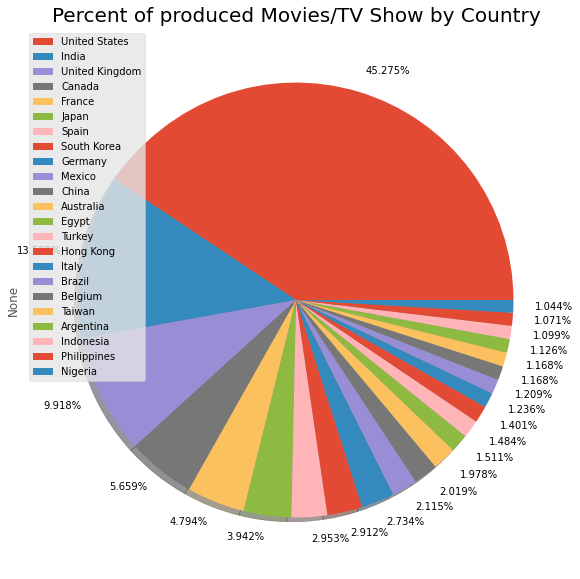

In [26]:
#Visualiztion of country share in pie chart

# take countries that share more than 1%
country_share=country_share[country_share > 1 ]
labels=country_share.round(3).astype('str') + '%'
#explode_list = [0.1, 0, 0, 0, 0.1, 0.1]
country_share.plot(kind='pie', figsize=(10,10), labels=labels, shadow=True)

plt.title('Percent of produced Movies/TV Show by Country', fontsize=20)
plt.legend(labels=country_share.index, loc='upper left')
plt.show()

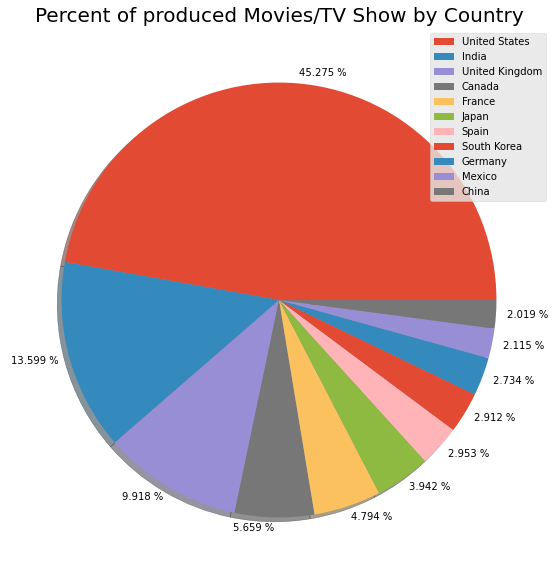

In [27]:
#Another method
# take countries that share more than 2%
country_share_1 = country_share[country_share > 2]
labels = country_share_1.round(3).astype('str') + ' %'

fig1, ax1 = plt.subplots(figsize=(10,10), facecolor='white')
ax1.pie(country_share_1, labels=labels, labeldistance=1.05,
        shadow=True)
plt.title('Percent of produced Movies/TV Show by Country', fontsize=20)
plt.legend(labels=country_share_1.index, loc='upper right')
plt.show()


'Unites States' has the maximum frequency. I will fill 'NaN' value in country column with 'United States'

In [28]:
df['country']=df['country'].fillna('United States')
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country            0
date_added        10
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [29]:
df=df.dropna(subset=['cast'], how='all')

In [30]:
df.cast.isnull().value_counts() 

False    7069
Name: cast, dtype: int64

No missing value is present in 'cast' column

In [31]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2090
cast               0
country            0
date_added        10
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [32]:
country_share

United States     45.274725
India             13.598901
United Kingdom     9.917582
Canada             5.659341
France             4.793956
Japan              3.942308
Spain              2.953297
South Korea        2.912088
Germany            2.733516
Mexico             2.115385
China              2.019231
Australia          1.978022
Egypt              1.510989
Turkey             1.483516
Hong Kong          1.401099
Italy              1.236264
Brazil             1.208791
Belgium            1.167582
Taiwan             1.167582
Argentina          1.126374
Indonesia          1.098901
Philippines        1.071429
Nigeria            1.043956
dtype: float64

In [33]:
#Formation of dataframe from 'country_share' series. 
df_country_share=country_share.to_frame().reset_index()
df_country_share.head()

,index,0
0,United States,45.274725
1,India,13.598901
2,United Kingdom,9.917582
3,Canada,5.659341
4,France,4.793956


In [34]:
df_country_share=df_country_share.rename(columns={'index':'Country', 0:'Frequency'})

In [35]:
df_country_share.head()

,Country,Frequency
0,United States,45.274725
1,India,13.598901
2,United Kingdom,9.917582
3,Canada,5.659341
4,France,4.793956


In [36]:
# Visualise data in World Map
import folium
print('Folium installed and imported')

Folium installed and imported


In [37]:
world_map = folium.Map()
world_map

In [38]:
!pip install xlrd

In [49]:
# download countries geojson file
!wget --quiet https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/world_countries.json
    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [50]:
world_geo = r'world_countries.json' # geojson file

# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2)

In [51]:
# generate choropleth map using Percent of produced Movies/TV Show of each country
world_map.choropleth(
    geo_data=world_geo,
    data=df_country_share,
    columns=['Country', 'Frequency'],
    key_on='feature.properties.name',
    fill_color='YlOrBr',
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Percent of produced Movies/TV Show by Country'
)

# display map
world_map

In [52]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2090
cast               0
country            0
date_added        10
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [53]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [54]:
#Extraction of genre fron 'listed_in' column
genre=df['listed_in'].apply(lambda x:x.strip() )
genre=genre.str.split(', ')
#another method:
#genre=df['listed_in'].apply(lambda x:x.split(', ') )
genre
genre_list=list(genre)
print(genre_list[5])
print(len(genre_list))



['International TV Shows', 'TV Dramas', 'TV Mysteries']
7069


Initiate encoder for finding count of unique items

In [55]:
#Initiate encoder
genre_encoder=TransactionEncoder().fit(genre)
transform=genre_encoder.transform(genre)


In [56]:
df_genre=pd.DataFrame(transform, columns=genre_encoder.columns_, index=df['show_id'])

In [57]:
df_genre.shape

(7069, 42)

In [58]:
#Total number of counts of each genre type
genre_count=df_genre.sum().sort_values(ascending=False)
genre_count.head(10)

International Movies        2275
Dramas                      2096
Comedies                    1460
International TV Shows      1109
Action & Adventure           715
TV Dramas                    699
Independent Movies           671
Romantic Movies              524
Children & Family Movies     504
TV Comedies                  503
dtype: int64

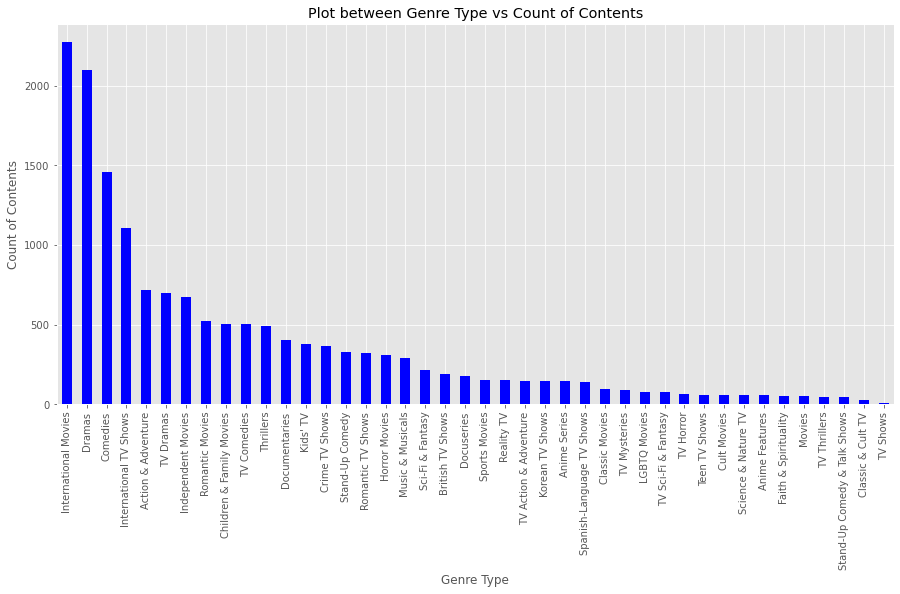

In [82]:
#creating Bar plot for genres

genre_count.plot(kind='bar', figsize=(15,7), color='b')

plt.xlabel('Genre Type')
plt.ylabel('Count of Contents')
plt.title('Plot between Genre Type vs Count of Contents')
plt.show()

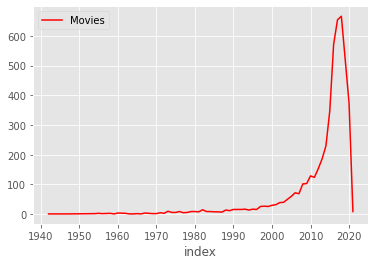

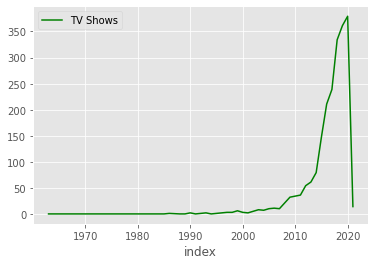

In [115]:
movies=df[df['type']=='Movie']['release_year'].value_counts().rename('Movies').reset_index()
TV_shows=df[df['type']=='TV Show']['release_year'].value_counts().rename('TV Shows').reset_index()

#Sorting value counts by years
movies=movies.sort_values(by='index')
TV_shows=TV_shows.sort_values(by='index')

movies_plot=movies.plot(kind='line', x='index', y='Movies', legend='Movies', color='r')

TV_Show_plot=TV_shows.plot(kind='line', x='index', y='TV Shows', legend='TV Shows', color='g')

## Recomendation System ##

In [124]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import sigmoid_kernel
model=TfidfVectorizer(max_df=2, min_df=1, token_pattern='(?u)\\b\\w\\w+\\b', max_features=None, stop_words='english', ngram_range=(1, 4))

In [121]:
df['combination']= df['description'] + df['cast'] + df['director']
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,combination
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,NaN
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,After a devastating earthquake hits Mexico Cit...


In [122]:
df['combination']=df['combination'].fillna(' ')

In [125]:
# Utilising fit and transform method on model object
tf_matrix=model.fit_transform(df['combination'])

sigmoid=sigmoid_kernel(tf_matrix, tf_matrix)
sigmoid[1]

array([0.76159416, 0.76159513, 0.76159416, ..., 0.76159416, 0.76159416,
       0.76159416])

In [126]:
indices=pd.Series(df.index, index=df['title'].drop_duplicates())
indices

title
3%                          0
7:19                        1
23:59                       2
9                           3
21                          4
                         ... 
Zoom                     7781
Zozo                     7782
Zubaan                   7783
Zulu Man in Japan        7784
Zumbo's Just Desserts    7785
Length: 7069, dtype: int64

In [127]:
def recommend(title,sig=sigmoid):
    idx = indices[title]
    sig_scores = list(enumerate(sig[idx]))
    sig_scores = sorted(sig_scores,key = lambda x:x[1], reverse = True)
    sig_scores = sig_scores[1:11]
    movies_indices = [i[0] for i in sig_scores]
    return df['title'].iloc[movies_indices]

In [132]:
recommend("Inside Man: Most Wanted")

3151    Jeremy Scott: The People's Designer
4002                 Maz Jobrani: Immigrant
1654                                Deadcon
0                                        3%
1                                      7:19
2                                     23:59
3                                         9
4                                        21
5                                        46
6                                       122
Name: title, dtype: object